# Исследование объявлений о продаже квартир

### Описание проекта :
Предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Задача — установить параметры.**
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию.

In [1]:
# Импортируем необходимые в анализе библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
# Загрузка даннх в переменную 'df_flat'. В ,базе данных используются в качестве разделителей табуляция - \t
df_flat = pd.read_csv('C:/Python/_File_test/real_estate_data.csv',sep='\t' )
print(f'В таблице {df_flat.shape[0]} строк и {df_flat.shape[1]} колонки')
df_flat.head()

В таблице 23699 строк и 22 колонки


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Вывод общей информации по данным
df_flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Описание данных в колонках:**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [4]:
# Вывод суммы пропусков базы данных по колонкам. 
df_flat.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

База данных является необработанной, так как в ней присутствуют пустые значения в ключевых позициях (ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, days_exposition), а формат данных отдельных значений следует изменить с float на int для более удобного анализа. Значит необходимо провести предобработку данных для дальнейшего анализа.

### Шаг 2. Предобработка данных.

Проблемы, которые нужно решать:

1. В таблице присутствуют пропуски данных с которыми необходимо разобраться:
- [x]        ceiling_height - можно использовать медианное значение колонки         
- [x]        floors_total - сгрупируем по этажу квартиры и применим метод агрегации - медиана             
- [x]        living_area -  используем медианное значение с групировкой по количеству квартир             
- [x]        is_apartment - пропуски вызваны человеческим фактором. пустому значению соотвествует - 0 (False)
- [x]        kitchen_area  -используем медианное значение с групировкой по количеству квартир             
- [x]        balcony    - если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. - [x]        locality_name             
- [x]        airports_nearest        
- [x]        cityCenters_nearest     
- [x]        parks_around3000        
- [x]        parks_nearest          
- [x]        ponds_around3000        
- [x]        ponds_nearest          
- [x]        days_exposition             
2. Необходимо изменить тип данных таблицы колонок : 
- [x]        first_day_exposition  - поменять на datetime формат %Y-%m-%d
- [x]        floors_total  - поменять на int
- [x]        is_apartment - поменять на bool
- [x]        balcony - поменять тип на int
- [x]        parks_around3000 - поменять на int
- [x]        ponds_around3000 - поменять на int
- [x]        days_exposition - поменять на int        

    
    

In [5]:
# Заполним пропуски в столбце living_area 

# Создадим таблицу df_living_area_median сгруппированню по кол-ву комнат и расчетом медианны жилой площади
df_living_area_median = df_flat.groupby('rooms').agg({'living_area':'median'})

# Заполним пропуски столбца living_area значениями из df_living_area_median
for room in df_living_area_median.index:
    df_flat.loc[df_flat.rooms == room, 'living_area'] = df_flat.loc[df_flat.rooms == room, 'living_area']\
    .fillna(df_living_area_median.loc[room, 'living_area'])
      
# Проверка заполнения пропусков столбца living_area. 0 - означает что пропусков нет.  
# (скроем) df_flat.living_area.isna().sum()

In [6]:
# Заполним пропуски в столбце kitchen_area              

# Создадим таблицу df_kitchen_area_median сгруппированню по кол-ву комнат и расчетом медианы площади кухни
df_kitchen_area_median = df_flat.groupby('rooms').agg({'kitchen_area':'median'})

# Заменим пропуски в таблице df_kitchen_area_median медианным значениям по площадям всех кухонь базы данных df_flat
df_kitchen_area_median.fillna(df_flat.kitchen_area.median(), inplace=True)

# Заполним пропуски столбца kitchen_area значениями из df_kitchen_area_median
for room in df_kitchen_area_median.index:
    df_flat.loc[df_flat.rooms == room, 'kitchen_area'] = df_flat.loc[df_flat.rooms == room, 'kitchen_area']\
    .fillna(df_kitchen_area_median.loc[room, 'kitchen_area'])
      
# Проверка заполнения пропусков столбца kitchen_area. 0 - означает что пропусков нет.  
# (скроем) df_flat.kitchen_area.isna().sum()

In [7]:
# Заполним пропуски в столбце с общим кол-вом этажей в доме floors_total

# Создадим новую таблицу df_floors_total_median и сгрупированную по этажу квартиры и расчетом медины общего кол-ва этажей для каждого этажа
df_floors_total_median = df_flat.groupby(['floor']).agg({'floors_total' : 'median'})
 
# Заполним пропуски в столбце floors_total из df_floors_total_median  
for floor in df_floors_total_median.index:
    df_flat.loc[df_flat.floor == floor, 'floors_total'] = df_flat.loc[df_flat.floor == floor, 'floors_total'] \
    .fillna(value = df_floors_total_median.loc[floor, 'floors_total'])
    
# Проверка заполнения пропусков столбца floors_total. 0 - означает что пропусков нет.  
# (скроем) df_flat.floors_total.isna().sum()

In [8]:
# Заполним пропуски в столбце высотой потолков ceiling_height

# При анализе базы данных зависимость высоты потолка от других колонок не выявлена
# Заменим пропуски ceiling_height медианным значением 
df_flat.ceiling_height = df_flat.ceiling_height.fillna(df_flat.ceiling_height.median())

# Проверка заполнения пропусков столбца ceiling_height. 0 - означает что пропусков нет.  
# (скроем) df_flat.ceiling_height.isna().sum()

In [9]:
# Заполним пропуски в столбце высотой потолков is_apartment
# Пропуски заменим значением 'False'
df_flat.is_apartment.fillna(value=False, inplace=True)

# Изменим тип даннх на bool 
df_flat.is_apartment = df_flat.is_apartment.astype('bool')

In [10]:
# Заполним пропуски в столбце наличия балкона balcony
# Пропуски заменим значением '0'
df_flat.balcony.fillna(value=0, inplace=True)

In [11]:
# Удалим строки где не указана информация в каком городе находится квартира
df_flat.dropna(subset='locality_name', inplace=True)

In [12]:
# Заполним пропуски в столбце airports_nearest медианным значением 
df_flat.airports_nearest.fillna(value=df_flat.airports_nearest.median() , inplace=True)

In [13]:
# Заполним пропуски в столбце cityCenters_nearest медианным значением 
df_flat.cityCenters_nearest.fillna(value=df_flat.cityCenters_nearest.median() , inplace=True)

In [14]:
# Заменим пропуски в столбце parks_around3000
# Пропуски заменим значением '0'
df_flat.parks_around3000.fillna(value=0, inplace=True)

In [15]:
# Заполним пропуски в столбце parks_nearest

# Создадим новую таблицу df_parks_nearest_median сгрупированную по количеству парков parks_around3000 и расчетаем медианое растояние до парков
df_parks_nearest_median = df_flat.groupby(['parks_around3000']).agg({'parks_nearest' : 'median'})
 
# Заполним пропуски в столбце parks_nearest из df_parks_nearest_median  
for park in df_parks_nearest_median.index:
    df_flat.loc[df_flat.parks_around3000 == park, 'parks_nearest'] = df_flat.loc[df_flat.parks_around3000 == park, 'parks_nearest'] \
    .fillna(df_parks_nearest_median.loc[park, 'parks_nearest'])
    
# Проверка заполнения пропусков столбца parks_nearest. 0 - означает что пропусков нет.  
# (скроем) df_flat.parks_nearest.isna().sum()

In [16]:
# Заменим пропуски в столбце ponds_around3000
# Пропуски заменим значением '0'
df_flat.ponds_around3000.fillna(value=0, inplace=True)

In [17]:
# Заполним пропуски в столбце ponds_nearest

# Создадим новую таблицу df_ponds_nearest_median сгрупированную по количеству парков ponds_around3000 и расчетаем медианое растояние до прудов
df_ponds_nearest_median = df_flat.groupby(['ponds_around3000']).agg({'ponds_nearest' : 'median'})
# Заменим пустые значния 0
df_ponds_nearest_median.fillna(0, inplace=True)
 
# Заполним пропуски в столбце parks_nearest из df_parks_nearest_median  
for pond in df_ponds_nearest_median.index:
    df_flat.loc[df_flat.ponds_around3000 == pond, 'ponds_nearest'] = df_flat.loc[df_flat.ponds_around3000 == pond, 'ponds_nearest'] \
    .fillna(df_ponds_nearest_median.loc[pond, 'ponds_nearest'])
    
# Проверка заполнения пропусков столбца parks_nearest. 0 - означает что пропусков нет.  
df_flat.ponds_nearest.isna().sum()

0

In [18]:
# Изменим тип колонки first_day_exposition на формат даты
df_flat.first_day_exposition = pd.to_datetime( df_flat.first_day_exposition, format='%Y-%m-%d')
# Присвоим значение переменной условно текущую дату (2022-10-20) - date_now
date_now = dt.datetime(2022, 10, 20)

#Заменим пустые значения колонки days_exposition на количество дней от публикации объявлений first_day_exposition до условно текущую даты date_now
df_flat.days_exposition = df_flat.days_exposition\
.fillna((date_now - df_flat.first_day_exposition) / dt.timedelta(days=1))

Пропуски в 'days_exposition' могли появится по причине того, что объявления еще актуальны и у них нет определенного количества дней размещения. Поэтому в них была подставлена разница между текущей датой и датой публикации. После данной замены появились новые очень большие значения 'days_exposition', так как изначальные пропуски могли появится из-за ошибок в хранении и передачи информации, из-за которых проданные квартиры могли оставаться долгое время как стоящие на проджу. Но их появления не повлиет на анализ в целом.

In [19]:
# Изменим тип данных float в int

for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
     df_flat[column] = df_flat[column].astype('int64')


Для облегчения анализа изменил тип данных в колонках 'floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition.

**(!!!)** Пока не вижу необходимости в замене типа данных в колонках 'last_price', 'total_area', 'living_area', 'kitchen_area' т.к. эти данные могут быть не целыми. Тип данных этих колонкок можно будет поменять, если в этом появится необходимость.

In [20]:
df_flat.locality_name

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23650, dtype: object

In [21]:
# Приведем данные в колонке locality_name к нижнему регистру
df_flat.locality_name = df_flat.locality_name.str.lower()

In [22]:
# Проверим на наличие дубликатов 
df_flat.duplicated().sum()

0

Грубых дубликатов нет.

In [23]:
# Проведем повторный анализ таблицы 
df_flat.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.684059,34.313121,5.893277,10.450393,0.591712,28324.300677,13943.198774,0.469091,2228.138732,0.590359,199.009471,355.941903
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.597081,21.708464,4.883317,5.639059,0.959662,11094.209978,7551.720168,0.748458,1265.572024,0.883539,305.203376,501.909631
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,21173.750000,10939.000000,0.000000,601.000000,0.000000,0.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26756.500000,13105.000000,0.000000,3127.000000,0.000000,0.000000,124.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,34358.000000,15247.000000,1.000000,3127.000000,1.000000,389.000000,390.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,2884.000000


### Вывод

Выполнена предобработка данных. Большая часть пустых значения значений збыла заполнена. Можно приступать к анализу базы данных. 

### Шаг 3. Посчитайте и добавьте в таблицу :

- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [24]:
# Добавим в Базу данных колонку price_area с ценой квадратного метра - расчет как отношение last_price к total_area
df_flat['price_area'] = round(df_flat.last_price / df_flat.total_area, 2)

Разнесем дату first_day_exposition на день недели, месяц  и год публикации объявления в 3 новые колонки weekday_exposition, month_exposition, year_exposition соответственно.

In [25]:
# 
df_flat['weekday_exposition'] = df_flat['first_day_exposition'].dt.day_name()
df_flat['month_exposition'] = df_flat['first_day_exposition'].dt.month
df_flat['year_exposition'] = df_flat['first_day_exposition'].dt.year

In [26]:
# Создадим функию fn_floor_group для категоризации этажа квартир floor_group
def fn_floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

# Добавим в базу данных колонку floor_group с категоиями этажа квартир применив функцию fn_floor_group
df_flat['floor_group'] = df_flat.apply(fn_floor_group, axis=1)

In [27]:
# Добавим отношением жилой площади и площади кухник к общей площади квартиры, в колонки  living_area_percent и kitchen_area_percent соотвественно. Данные укажем в процентах.
df_flat['living_area_percent'] = round(df_flat.living_area / df_flat.total_area *100, 2)
df_flat['kitchen_area_percent'] = round(df_flat.kitchen_area / df_flat.total_area*100, 2)

### Вывод

Были проведены расчеты и полученные данные добавлены в базу данных в колонки : 'price_area', 'weekday_exposition',        'month_exposition', 'year_exposition', 'floor_group', 'living_area_percent', 'kitchen_area_percent'.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

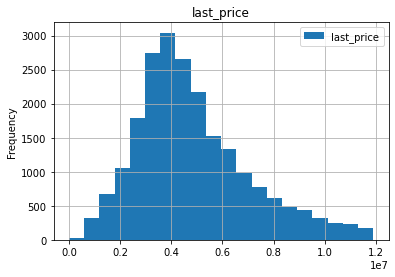

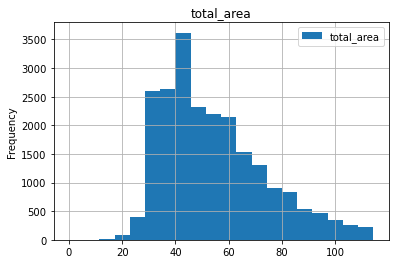

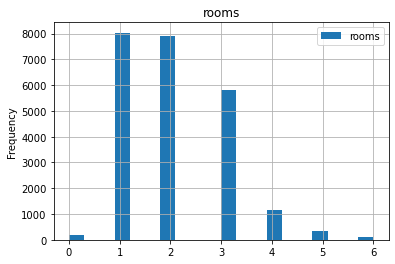

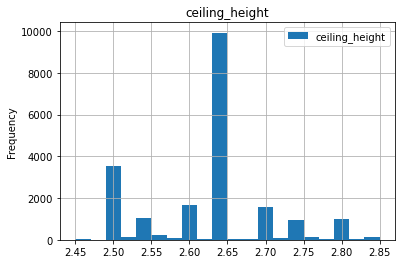

In [28]:
# Построим гистограммы для исследования параметров: площадь, цена, число комнат, высота потолков. 
for column in ['last_price', 'total_area', 'rooms', 'ceiling_height']: 
    quantiles = df_flat[column].quantile([0.25, 0.75]) 
    size = quantiles.iloc[1] - quantiles.iloc[0]
    df_flat.plot(y=column, kind='hist', title= column, bins=20, grid=True, range=(max(0, quantiles.iloc[0] - 1.5 * size), quantiles.iloc[1] + 1.5 * size))
    plt.show()
    

Выводы на основе изучения гистограмм:
* Цена продажи в основном варьируется от 2 до 6 млн руб. Самая распространенная цена равна 4 млн руб.
* Размер квартиры в основном варьируется от 30 до 70 кв м. Самый распространенный размер равен 45 кв м.
* В основном квартиры имеют 1, 2 и 3 комнаты. Остальные типы квартир встречаются намного реже.
* Самая распространенная высота потолка явлется 2,65 м., второй является 2,50 м. Остальные высоты встречаются намного реже.

Основные показатели: 
count    23650.000000
mean       355.941903
std        501.909631
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       2884.000000
Name: days_exposition, dtype: float64


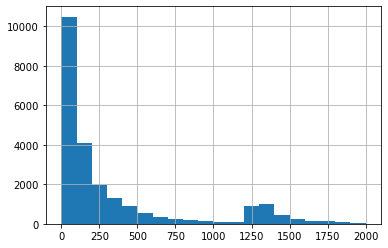

In [29]:
# Построим гистограмму времени продажи квартиры
df_flat.days_exposition.hist(bins=20, range=(0,2000))

# Выведем основные показатели колонки времени продажи квартиры в том числе среднее и медианное значение
# (скроем) print(f'Среднее значение времени продажи квартиры: {round(df_flat.days_exposition.mean(), 2)}')
# (скроем)print(f'Медиана времени продажи квартиры: {round(df_flat.days_exposition.median(), 2)}')
print('Основные показатели: ')
print(df_flat.days_exposition.describe())

Выводы :
* Среднее значение 355 больше медианного 124, что характеризуется большим количество выбросов, который можем наблюдать на гистограмме ( значения более 1.5 межквантильного расстояния - 908) 
* В большинстве случаев продажа квартиры занимает от 45 до 390 дней, чаще 124 дня. 
* Продажу квартиры можно считать необычно долгой она была продана более чем 390 дней (>75%) 
* Продажа прошла очень быстро, если она была продана меньше чем за 45 дн (<25%)

In [30]:
# Сделаем расчет верхней границы "усов" - для отсечения выбросов из анализа данных
for column in [ 'last_price','total_area', 'rooms', 'cityCenters_nearest', 'floors_total', 'living_area', 'kitchen_area','price_area']:
      print(f'{column} имеет выбросы значений больших {(df_flat[column].describe().iloc[6] - df_flat[column].describe().iloc[4])*1.5 + df_flat[column].describe().iloc[6]}')   

last_price имеет выбросы значений больших 11897500.0
total_area имеет выбросы значений больших 114.25
rooms имеет выбросы значений больших 6.0
cityCenters_nearest имеет выбросы значений больших 21709.0
floors_total имеет выбросы значений больших 32.5
living_area имеет выбросы значений больших 79.15
kitchen_area имеет выбросы значений больших 17.8
price_area имеет выбросы значений больших 170762.9525


In [31]:
# Создадим отдельную таблицу df_flat_refresh без выбросов данных 
df_flat_refresh = df_flat.query('last_price < 11897500.0')
df_flat_refresh = df_flat.query('total_area < 114.25')
df_flat_refresh = df_flat.query('rooms < 6.0')
df_flat_refresh = df_flat.query('cityCenters_nearest < 21709.0')
df_flat_refresh = df_flat.query('floors_total < 32.5')
df_flat_refresh = df_flat.query('living_area < 79.15')
df_flat_refresh = df_flat.query('kitchen_area < 17.8')
df_flat_refresh = df_flat.query('price_area < 170762.9525')
# Выведем значения кореляций для колонки last_price 
df_flat_refresh.corr().query('abs(last_price) > 0.25')['last_price'].sort_values(ascending=False)

last_price             1.000000
total_area             0.854371
living_area            0.738804
kitchen_area           0.588548
rooms                  0.581888
price_area             0.535294
ponds_around3000       0.263843
parks_around3000       0.263645
cityCenters_nearest   -0.252801
parks_nearest         -0.262668
Name: last_price, dtype: float64

Выводы :

Больше всего цена зависит от общей площади. Так же наблюдается зависимость от жилой площади, количества комнат, площади кухни. В меньшей степени наблюдается прямая зависимость от количества парков и прудов в радиусе 3 км. 

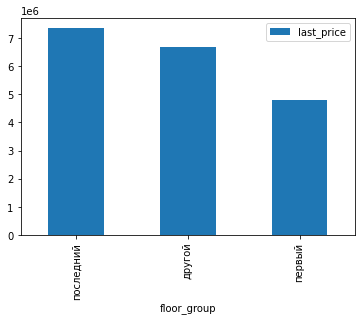

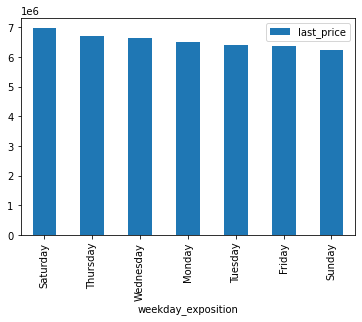

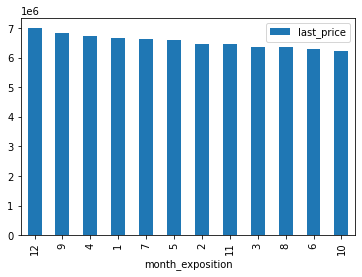

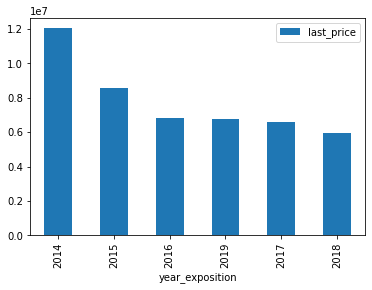

In [32]:
# Изучим зависимость цены от типа этажа, дня недели, месяца и года.
for column in ['floor_group', 'weekday_exposition', 'month_exposition', 'year_exposition']: 
    df_flat.pivot_table(index=column, values='last_price', aggfunc='mean').sort_values('last_price', ascending=False)\
    .plot(kind='bar')
#    plt.show()




Выводы: 
1. Самая высокая средняя цена продажи у последних этажей, чуть меньше у других, цена у первых этажей значительно меньше. 
2. Самая высокая средняя цена продажи в субботу, чуть меньше в четверг. Самая низкая цена в воскресенье и пятницу. 
3. Самая высокая средняя цена продажи в декабре, чуть меньше в сентябре и апреле. Самая низкая цена в октябре и июне. 
4. Кризис в 2014 года значительно ударил по цене недвижимости. И цены сейчас не выросли до уровня 2015 года.

                   Количество объявлений  Средняя цена за квадратный метр
locality_name                                                            
санкт-петербург                    15721                    114849.008793
посёлок мурино                       522                     85752.189157
посёлок шушары                       440                     78677.364318
всеволожск                           398                     68654.473970
пушкин                               369                    103125.819377
колпино                              338                     75424.579112
посёлок парголово                    327                     90175.913089
гатчина                              307                     68746.146515
деревня кудрово                      299                     92473.547559
выборг                               237                     58141.909325


<AxesSubplot:xlabel='locality_name'>

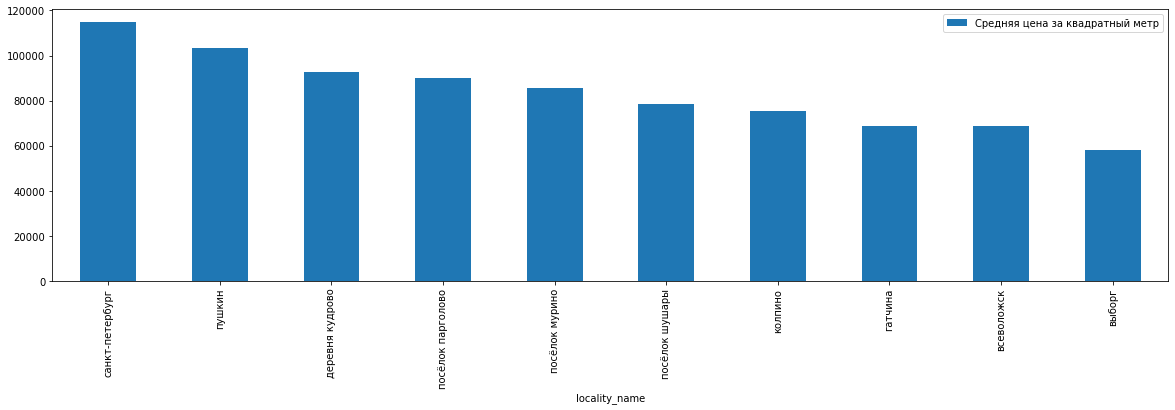

In [33]:
#Сгрупируем спискок по населенным пунктам locality_name и посчитаем количество объявлений и среднюю цену за квадратный метр в таблице top_10
top_10 = df_flat.pivot_table(index='locality_name', values='price_area', aggfunc=['count', 'mean'])
# Для удобсвта переименуем колонки таблицы
top_10.columns = ['Количество объявлений','Средняя цена за квадратный метр']
# Выведем информацию о 10 населённых пунктов с наибольшим числом объявлений
top_10 = top_10.sort_values('Количество объявлений', ascending=False).head(10)
print(top_10)
# Построим горафик зависимости средней цены за квадратный метр от населенного пункта
top_10.sort_values(by='Средняя цена за квадратный метр', ascending=False)\
.plot(y='Средняя цена за квадратный метр', kind = 'bar', figsize = (20,5))

Выводы:
Санкт-Петербург значительно отрывается от остальных населенных пунктов по кол-ву объявлений. Остальные города имеют примерно одинаковое кол-во объявлений. Средняя цена за кв м выше всего в Санкт-Петербурге и в Пушкино. Остальные города ниже.

In [34]:
# Узнаем самую высокую стоимость жилья и в каком населенном пункте она находится
# Пересоздал исходные данные в новой переменной df_flat_2
df_flat_2 = pd.read_csv('C:/Python/_File_test/real_estate_data.csv',sep='\t' )

print(df_flat_2.last_price.max())
df_flat_2[df_flat_2.last_price == df_flat_2.last_price.max()]['locality_name']



763000000.0


12971    Санкт-Петербург
Name: locality_name, dtype: object

Самая высокая цена 763 000 000.00 руб в Санкт-Петербурге.

In [35]:
# Узнаем самую низкую стоимость жилья и в каком населенном пункте она находится
print(df_flat_2.last_price.min())
df_flat_2[df_flat_2.last_price == df_flat_2.last_price.min()]['locality_name']

12190.0


8793    Санкт-Петербург
Name: locality_name, dtype: object

Самая низкая цена 12 190.00 руб в Санкт-Петербурге.

Новая переменная создана для того, чтобы ограничения появившиеся во время анализа не повлияли на поиск самого большой цены продажи.

<AxesSubplot:xlabel='new_cityCenters_nearest'>

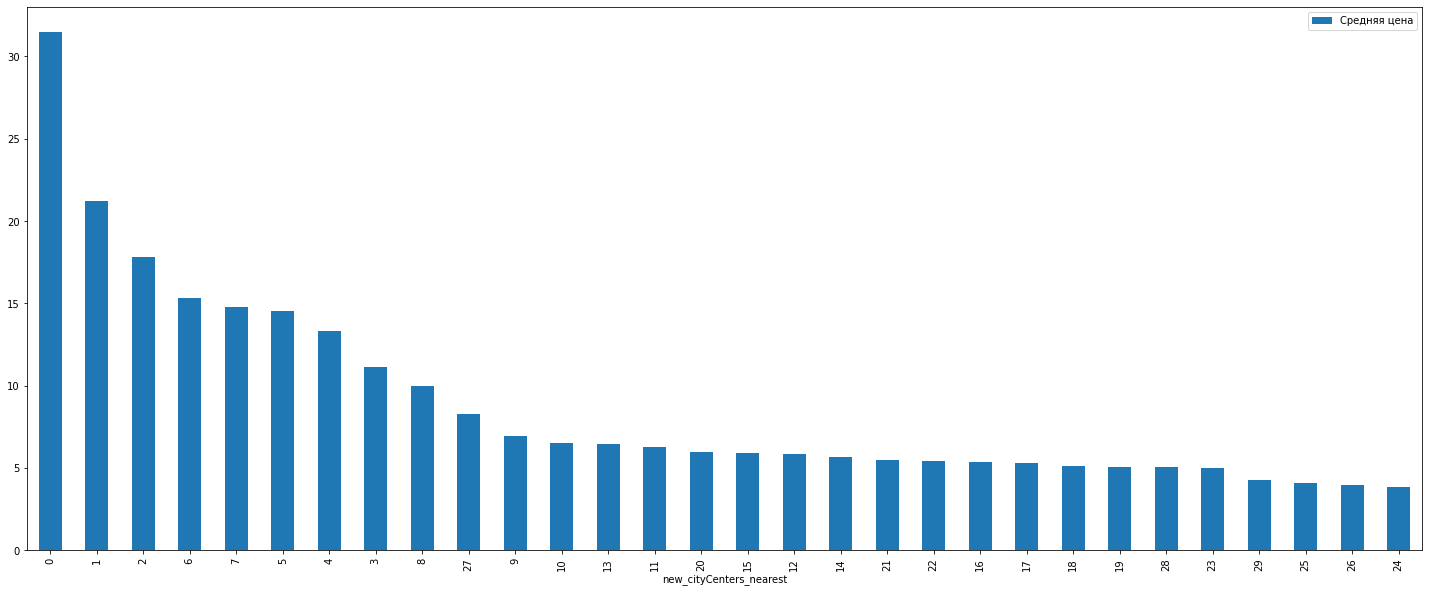

In [36]:
# Создадим новую таблицу df_flat_spb с данными только по Санкт-Петербургу
df_flat_spb = df_flat.query('locality_name == "санкт-петербург"').copy()

# Переведем цены в более удобный формат
df_flat_spb['cut_price'] = df_flat_spb['last_price']/1000000

# Создадим столбец с расстоянием до центра в километрах и округлим до целых значений переведем в тип int
df_flat_spb['cityCenters_nearest'] = df_flat_spb['cityCenters_nearest'].fillna(0)
df_flat_spb['new_cityCenters_nearest'] = round(df_flat_spb['cityCenters_nearest']/1000, 0).astype('int')

# Создадим таблицу средней цены квартиры, сгруппированной по километражу
average_price = df_flat_spb.pivot_table(index='new_cityCenters_nearest', values='cut_price', aggfunc=['mean'])

# Переименуем столбец и отсортируем по убыванию
average_price.columns=['Средняя цена']
average_price = average_price.sort_values(by='Средняя цена', ascending=False)

# Построим график зависимости средней цены от удаленности от центра
average_price.plot(kind='bar', y='Средняя цена', figsize=(25,10))



Выводы: 

Все позиции, в которых не указаны данные по местоположению квартиры, были перенесены в нулевой километр. Это не повлияет на решение по выбору центра города, так как нулевой километр в любом случае будет в центре города, а падение средней цены будет дальше.
По графику видно, что центр города находится внутри 8 км.
Интереснно что из линейности графика выбивается 27 километр от центра где цены возрастают, возможно там находится элитный спальный район.  

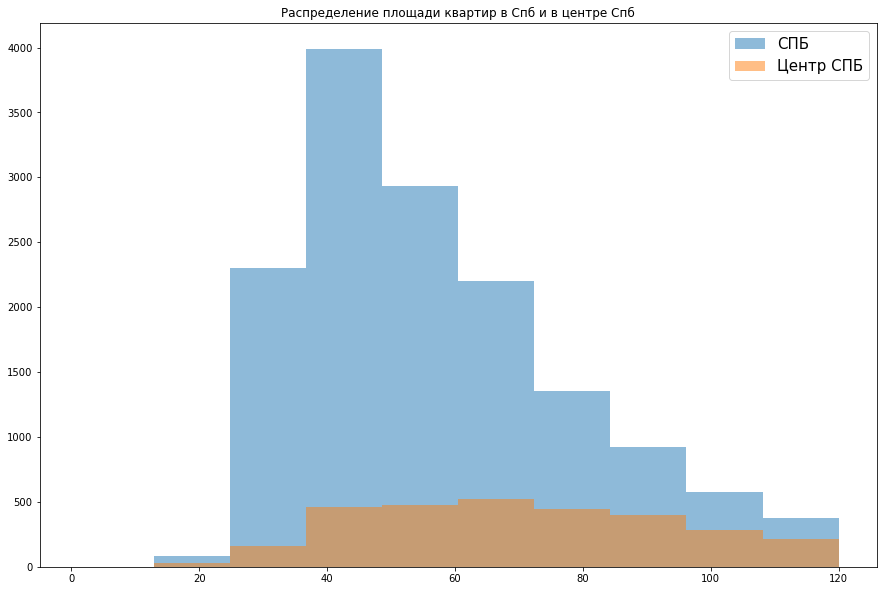

In [37]:
# Построим гистограмму распределения площади квартир в Спб и в центре Спб
plt.figure(figsize = (15,10))
plt.title('Распределение площади квартир в Спб и в центре Спб')
plt.hist(df_flat.query('locality_name == "санкт-петербург" ')['total_area'], 
         range = (1,120), bins = 10, alpha = 0.5, label ='СПБ')
plt.hist(df_flat.query('locality_name == "санкт-петербург" and cityCenters_nearest < 8000')['total_area'], 
         range = (1,120), bins = 10, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 15})

По данным гистограммам можно сделать вывод что в центре Спб равно распределена площадь квартир между значениями в 40 и 90 кв м. Но по всему Спб чаще встречаются квартиры от 30 до6 70 кв м., а квар-ры в 40 кв м самые популярные. Так могло произойти из-за массовой застройки экономичных панельных домов в новых районах Спб.

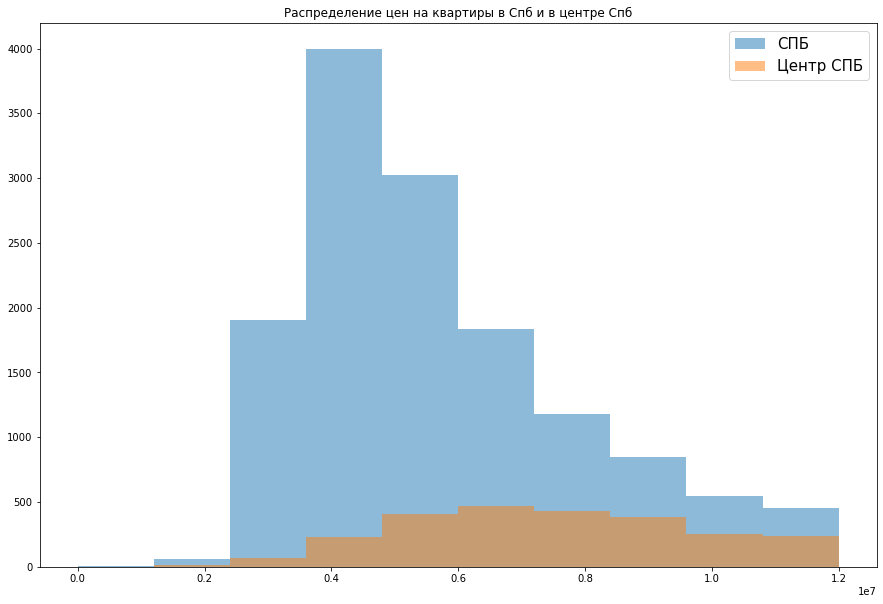

In [38]:
# Построим гистограмму распределения цен на квартиры в Спб и в центре Спб
plt.figure(figsize = (15,10))
plt.title('Распределение цен на квартиры в Спб и в центре Спб')
plt.hist(df_flat.query('locality_name == "санкт-петербург" ')['last_price'], 
         range = (1,12000000), bins = 10, alpha = 0.5, label ='СПБ')
plt.hist(df_flat.query('locality_name == "санкт-петербург" and cityCenters_nearest < 8000')['last_price'], 
         range = (1,12000000), bins = 10, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 15})

Цены в центре в среднем дороже чем во всем городе. В центре чаще всего встречаются цены от 5 до 9 млн руб. Во всем Спб чаще всего цены варьируются от 3 до 6 млн руб. Большинство цен во всем СПБ районе 4 млн. руб 

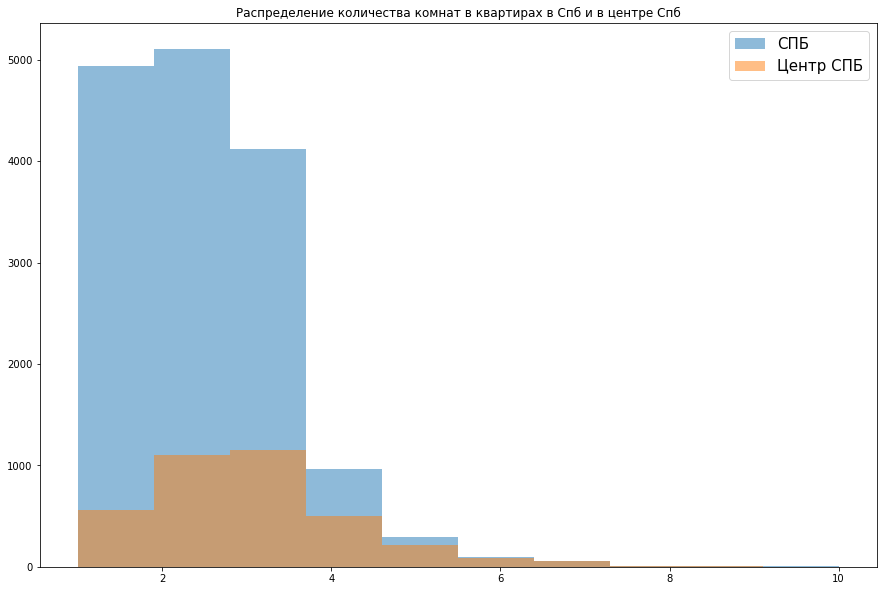

In [39]:
# Построим гистограмму количества комнат в квартирах в Спб и в центре Спб
plt.figure(figsize = (15,10))
plt.title('Распределение количества комнат в квартирах в Спб и в центре Спб')
plt.hist(df_flat.query('locality_name == "санкт-петербург" ')['rooms'], 
        range = (1,10), bins = 10, alpha = 0.5, label ='СПБ')
plt.hist(df_flat.query('locality_name == "санкт-петербург" and cityCenters_nearest < 8000')['rooms'], 
         range = (1,10), bins = 10, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 15})

В центре Спб чаще всего застраивали квартирами с 2 и 3 комнатами, а квартир с 1 и 4 комнатами примерно одинаковое количество. Во всем Спб чаще встречаются квартиры с 1 и 2 комнатами, чуть реже 3-х комнатные квартиры, а 4 и 5 комнатных квартир значительно меньше.

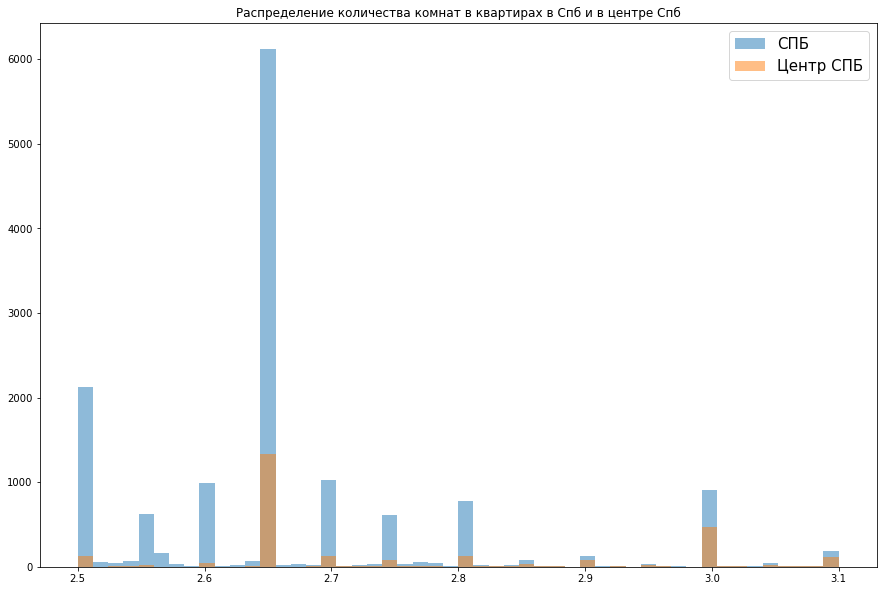

In [40]:
# Построим гистограмму количества комнат в квартирах в Спб и в центре Спб
plt.figure(figsize = (15,10))
plt.title('Распределение количества комнат в квартирах в Спб и в центре Спб')
plt.hist(df_flat.query('locality_name == "санкт-петербург" ')['ceiling_height'], 
        range = (2.5,3.1), bins = 50, alpha = 0.5, label ='СПБ')
plt.hist(df_flat.query('locality_name == "санкт-петербург" and cityCenters_nearest < 8000')['ceiling_height'], 
         range = (2.5,3.1), bins = 50, alpha = 0.5, label = 'Центр СПБ')
plt.legend(prop={'size': 15})

В центре Спб в оснвоном строили квартиры с высотой 2,65 и 3 м, а остальные высоты потолков встречаются крайне редко. Во всем Спб превалируют квартиры с высотой 2,65 м и 2,50 м. Остальные высоты встречаются реже. 

In [68]:
#Выведем значения кореляции цены для квартир в центре Спб last_price_center и в Спб last_price_spb для свнительного анализа
# Создадим новый массив данных для квартир в центре Спб
df_flat_center=df_flat.query('cityCenters_nearest < 8000 & locality_name == "санкт-петербург"').copy()

# Создадим отдельную таблицу корреляции цены в центре от факторов
df_corr_spb_1 = pd.DataFrame(df_flat_center.corr()['last_price'].sort_values(ascending=False))
# Переименуем колонку с результатом 
df_corr_spb_1.columns = ['last_price_center']

# Добавим в таблицу колонку с данными кореляции в Спб и выведем на экран кореляцию в центре более 0.1
df_corr_spb_1['last_price_spb'] = df_flat_spb.corr()['last_price'].sort_values(ascending=False)
df_corr_spb_1.query('abs(last_price_center) > 0.1')

,last_price_center,last_price_spb
last_price,1.000000,1.000000
price_area,0.779992,0.761203
total_area,0.636407,0.657188
living_area,0.526408,0.562015
kitchen_area,0.427498,0.453707
rooms,0.333342,0.372375
total_images,0.131486,0.098041
floor,0.125747,-0.000838
parks_around3000,0.108583,0.153233
ponds_around3000,0.104545,0.169452


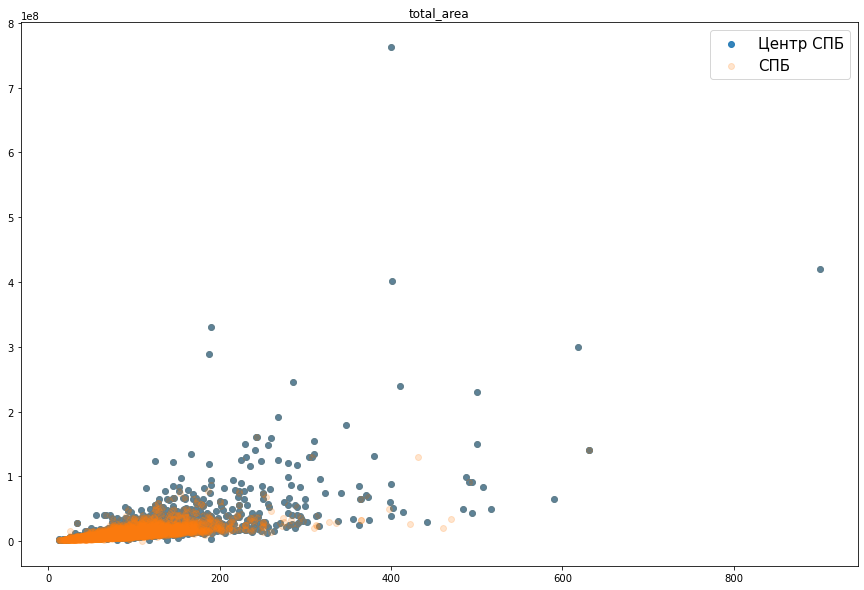

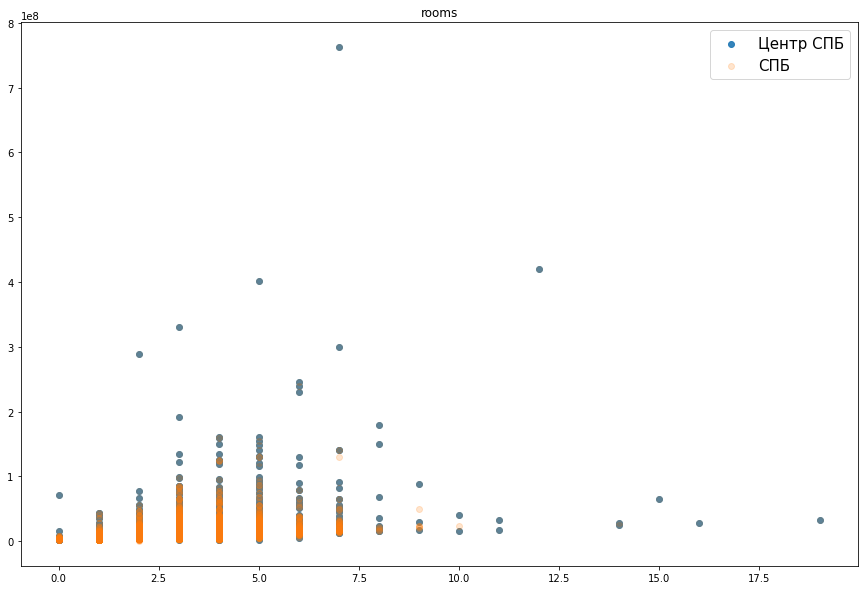

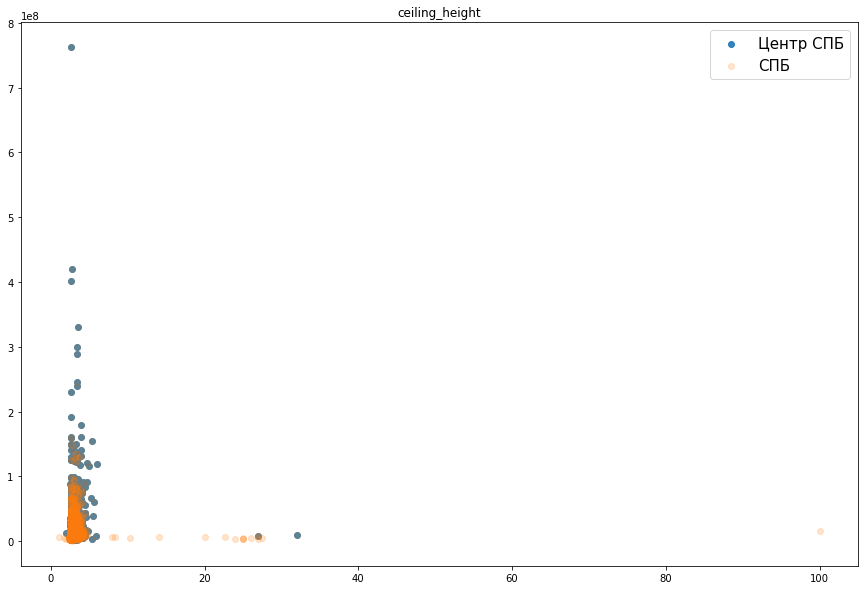

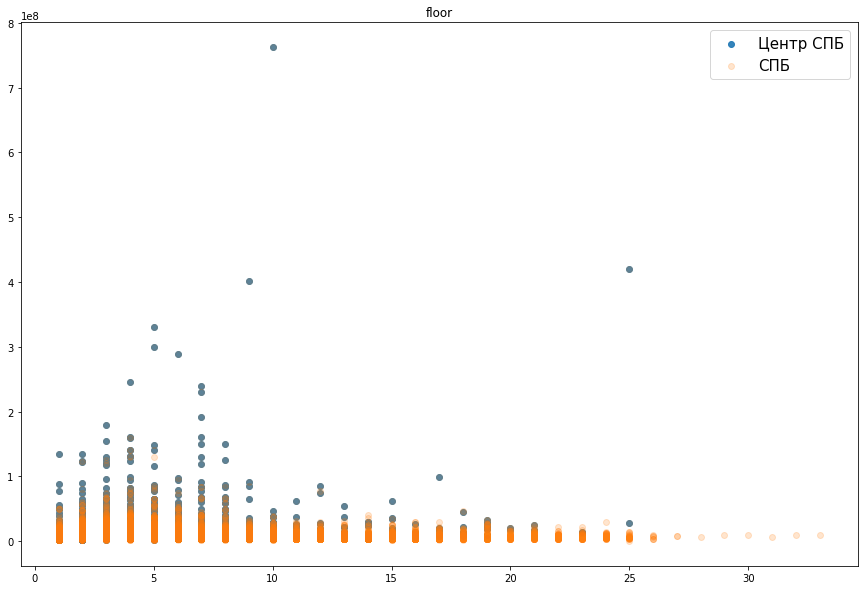

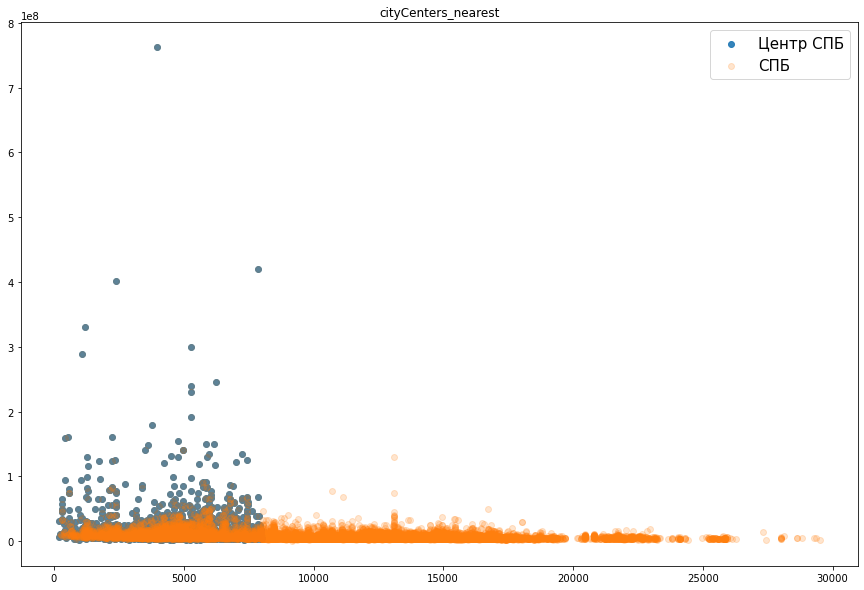

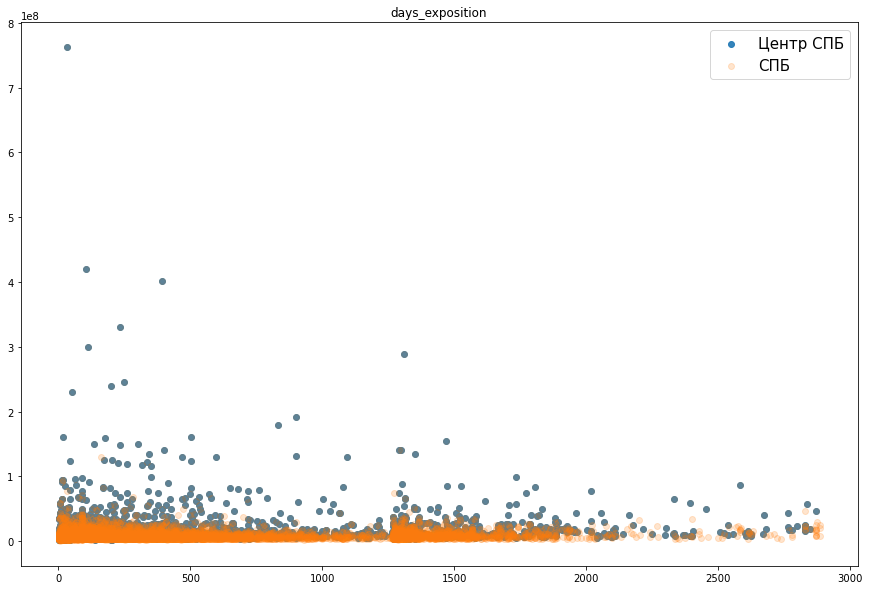

In [87]:
# Построим графики кореляции цены от 'total_area', 'rooms', 'ceiling_height', 'floor', 'cityCenters_nearest', 'days_exposition' для центра Спб и Спб
for column in ['total_area', 'rooms', 'ceiling_height', 'floor', 'cityCenters_nearest', 'days_exposition']:
    plt.figure(figsize = (15,10))
    plt.title(column)
    plt.scatter(x=df_flat_center[column], y=df_flat_center['last_price'], alpha=0.9, label ='Центр СПБ')
    plt.scatter(x=df_flat_spb[column], y=df_flat_spb['last_price'], alpha=0.2, label ='СПБ')
    plt.legend(prop={'size': 15})

Выводы: 

Больше всего на цену продажи влияет напрямую размер квартиры (0,63), существенно слабее влияет количество комант (0,33). Показатели высоты потолка, тип этажа, удаленность от цента и дата размещения объявления практически не влияют. Это происходит потому что спрос на квартиры в центре Спб очень высок, и такие показатели как высота потолков, число комнат, этаж, удалённость от центра, дата размещения объявления уходят на второй план. Главное различие между квартирами в центре для покупателей здесь играет только размер и количество комнат. Возможно это происходит потому что квартиры в центре идентичны друг другу по типу.

### Шаг 5. Общий вывод

- Цена продажи больше всего зависит от цены кв. м., расположенности этажа, года публикации и местоположения.
- В основном квартиры продаются меньше чем за 125 дней, редко на продажу уходит больше чем 13 мес. Быстрыми продажами являются те, которые произошли меньше чем за 45 дней.
- Судя по произведенным исследованиям можно сделать выводы, что цены продаж квартир значительно снизились из-за общего мирового кризиса в 2014 г., и они не могут выйти на прежний уровень до сих пор. Данный кризис больше всего повлиял на ценны.
- Структура квартир в центре Санкт-Петербурга, который находится внутри 8 км., и других его районов сильно разнится. В центре Спб квартиры больше по размерам и дороже. В других районах Спб квартиры строились из расчета, чтобы они были более доступны для покупателей. Поэтому квартиры меньше и дешевле.
- Спб значительно превышает по большинству показателей (средняя цена продажи, цена кв. м., количество объявлений и тд.) остальные населенные пункты. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод